In [1]:
import pandas as pd
from textblob import TextBlob
import datetime 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
all_results = pd.read_csv(r"C:\Users\User\archives-scraping-master\Results\AllResults.csv")

In [3]:
all_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5070 entries, 0 to 5069
Data columns (total 5 columns):
index     5043 non-null float64
search    5045 non-null object
title     5045 non-null object
date      5045 non-null object
body      5011 non-null object
dtypes: float64(1), object(4)
memory usage: 198.2+ KB


In [4]:
all_results[['polarity', 'subjectivity']] = all_results['body'].apply(lambda body: pd.Series(TextBlob(str(body)).sentiment))

In [5]:
all_results
all_results[all_results['polarity'] >= .5]

index                     search  \
1305  1303.0            Core Curriculum   
2855  2854.0  Contemporary Civilization   
3971  3970.0                Global Core   
4329  4328.0      Literature Humanities   

                                                  title       date  \
1305                                CAN'T STOP THE BEET   2/6/2008   
2855  Spectator Selects Managing Boards; Shapiro and...  3/13/1964   
3971                                   SPECTRUM, ONLINE  4/16/2013   
4329                  Memorial Service for Wallace Gray   4/4/2002   

                                                   body  polarity  \
1305  ARTS & ENTERTAINMENT, PAGE 3 A college with Co...  0.500000   
2855  Fifteen Specmen Receive McKnight Journalism Pr...  0.510935   
3971  Registration ~ Still looking for a Global Core...  0.500000   
4329  There will be a memorial service today for Pro...  0.500000   

      subjectivity  
1305      0.900000  
2855      0.294489  
3971      0.150000  
4329      0.500000

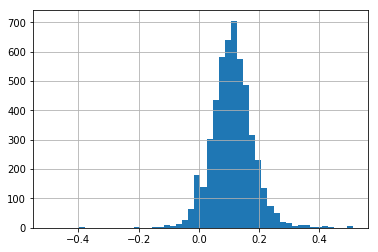

In [6]:
all_results['polarity'].hist(bins=50)

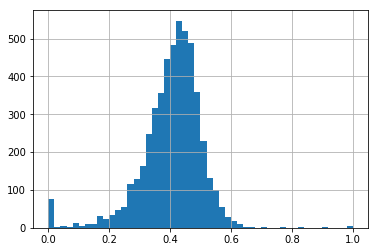

In [7]:
all_results['subjectivity'].hist(bins=50)

In [8]:
all_results['date'] = pd.to_datetime(all_results["date"], errors='coerce')
all_results = all_results.dropna(subset=['date'])    
all_results.drop(['index'], axis=1, inplace=True)
all_results

search                                              title  \
0      Core Curriculum                                    Northern Lights   
1      Core Curriculum   FRESHMAN'S COURSE GUIDE — YOUR PROGRAM THIS YEAR   
2      Core Curriculum  PRE-MED EDUCATION Faculty Group to Discuss Lib...   
3      Core Curriculum                                  3. Academic Scene   
4      Core Curriculum                                    Shock Treatment   
...                ...                                                ...   
5040  Music Humanities                       Core courses coming to Paris   
5041  Music Humanities         CCSC plans return of Columbia College Days   
5042  Music Humanities        Inconsistent salaries for adjuncts in A & S   
5043  Music Humanities      Joint Music and Art Hum class will be offered   
5044  Music Humanities                        Boyce renews spirit at SEAS   

           date                                               body  polarity  \
0    1951-10-22  We have noticed the wide and favorable newspap...  0.082465   
1    1953-09-16  The Columbia College catalogue for this year l...  0.095969   
2    1954-02-16  Faculty Group to Discuss Liberal Arts Concentr...  0.102652   
3    1954-04-08  The Last of Three Final Editorials The college...  0.150606   
4    1956-12-11  The latest survey of Columbia College's academ...  0.080390   
...         ...                                                ...       ...   
5040 2014-05-01  Art Hum, ‘ Muslc Hum V Wlll be taught 1n sprin...  0.157792   
5041 2014-10-16  BY DYLAN COOPER Spectator Staﬁ" Writer Two yea...  0.242328   
5042 2015-09-10  .BY GIULIA OLSSON ' Spectator Senior Sta]ffWri... -0.086820   
5043 2015-10-08  BY I-lANA KATEMAN Columbia Daily Spectator . ,...  0.235204   
5044 2015-10-29  New InltlatlVes, faculty hll'€S school Spectat...  0.131103   

      subjectivity  
0         0.365669  
1         0.406644  
2         0.354455  
3         0.497735  
4         0.456133  
...            ...  
5040      0.424069  
5041      0.490410  
5042      0.514226  
5043      0.489413  
5044      0.464026  

[5043 rows x 6 columns]

58318


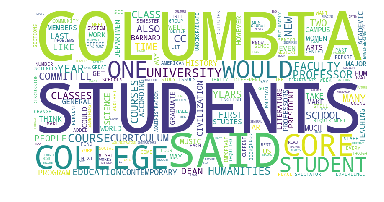

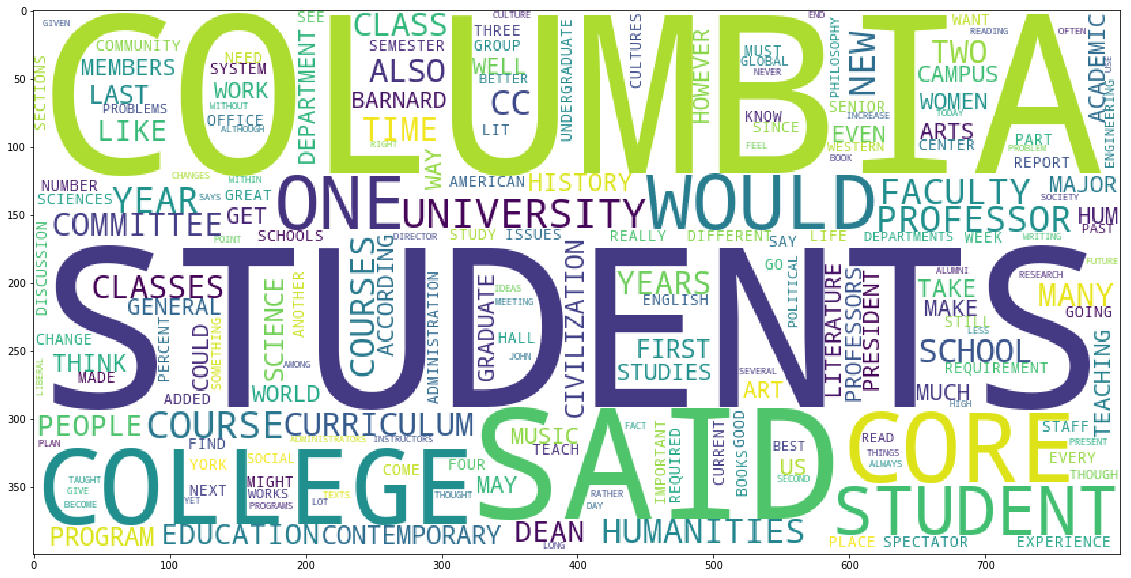

In [9]:
body = all_results.body.str.cat(sep=' ')

tokens = word_tokenize(body)

stop_words = set(stopwords.words('english'))
tokens = [w.upper() for w in tokens if (not w.lower() in stop_words) and (w.isalpha())]

vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

#this creates a wordcloud of all of the most commen alphanumeric words across all decades in the article body
wordcloud = WordCloud(width=800, height=400, background_color="white")
WordCloud.generate_from_frequencies(wordcloud, frequency_dist, max_font_size=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)


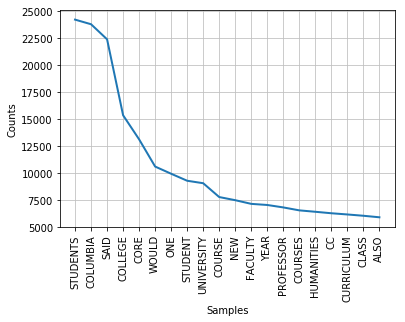

In [10]:
frequency_dist.plot(20)

In [11]:
stop_words = set(stopwords.words('english'))

#same function as above by generic for any dataframe's body element
def cloudify_body(table):
    text = table.body.str.cat(sep=' ')
    
    tempTokens = word_tokenize(text)
    tempTokens = [w.upper() for w in tempTokens if (not w.lower() in stop_words) and (w.isalpha())]

    vocabulary = set(tempTokens)
    #print(len(vocabulary))

    frequency_dist = nltk.FreqDist(tempTokens)
    #print(sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50])
    
    wordcloud = WordCloud(width=800, height=400, background_color="white")
    WordCloud.generate_from_frequencies(wordcloud, frequency_dist, max_font_size=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.figure( figsize=(20,10) )
    plt.imshow(wordcloud)

In [12]:
#same function as above by generic for any dataframe's headline element
def cloudify_headlines(table):
    text = table.title.str.cat(sep=' ')
    
    tempTokens = word_tokenize(text)
    tempTokens = [w.upper() for w in  tempTokens if ((not w.lower() in stop_words) & (w.isalpha()))]

    vocabulary = set(tempTokens)
   # print(len(vocabulary))

    frequency_dist = nltk.FreqDist(tempTokens)
   # print(sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50])
    
    wordcloud = WordCloud(width=800, height=400, background_color="white")
    WordCloud.generate_from_frequencies(wordcloud, frequency_dist, max_font_size=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.figure( figsize=(20,10) )
    plt.imshow(wordcloud)

In [13]:
dates=["1919-1929", "1929-1939", "1939-1949", "1949-1959", "1959-1969", 
       "1969-1979","1979-1989", "1989-1999", "1999-2009", "2009-2019"]

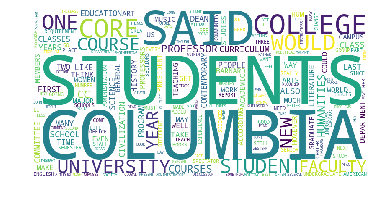

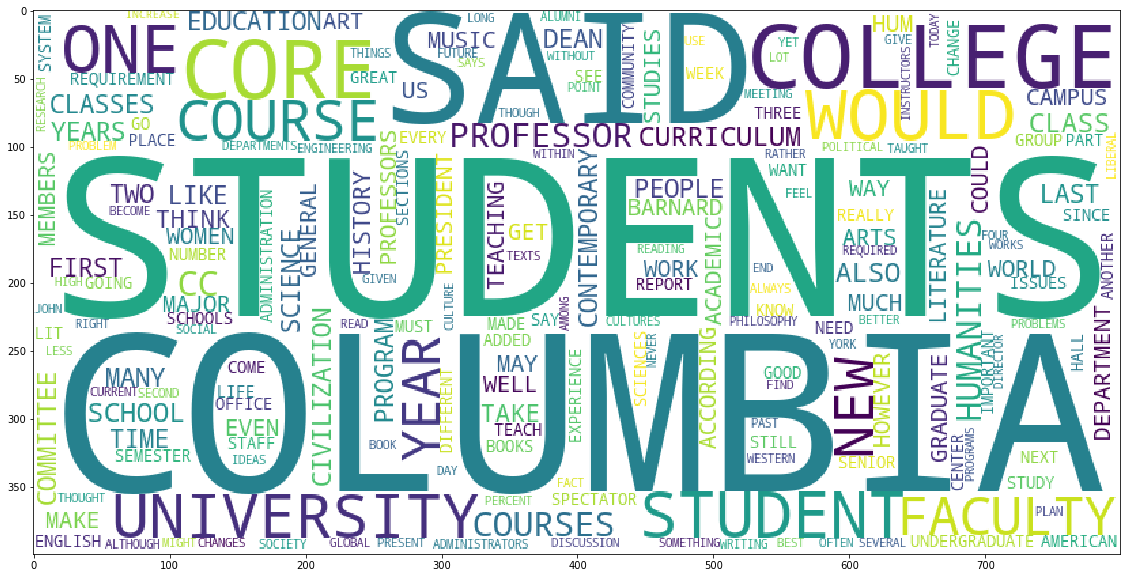

In [14]:
#again a wordcloud of all of the body texts
cloudify_body(all_results)

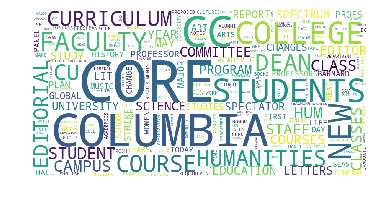

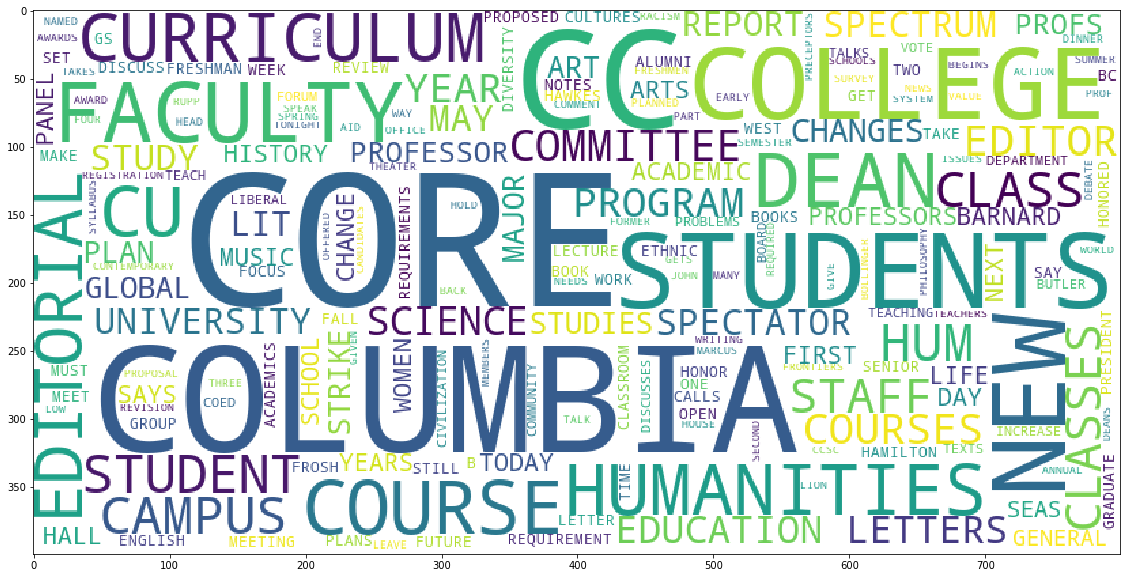

In [15]:
#now a wordcloud of all of the title texts
cloudify_headlines(all_results)

In [16]:
#this creates a list of dataframes split in to decades. Ignore the error it still works ¯\_(ツ)_/¯

decade=[]
for x in range(10):
    decade.append(all_results[ (all_results['date'] > datetime.date(year=(1919 + (x*10)),month=1,day=1)) & (all_results['date'] < datetime.date(year=(1929 + (x*10)),month=1,day=1))])

C:\Users\User\Anaconda3\envs\Scraper\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """


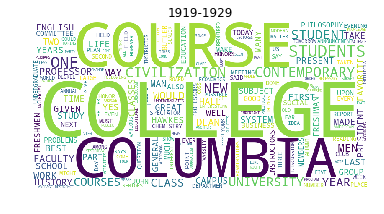

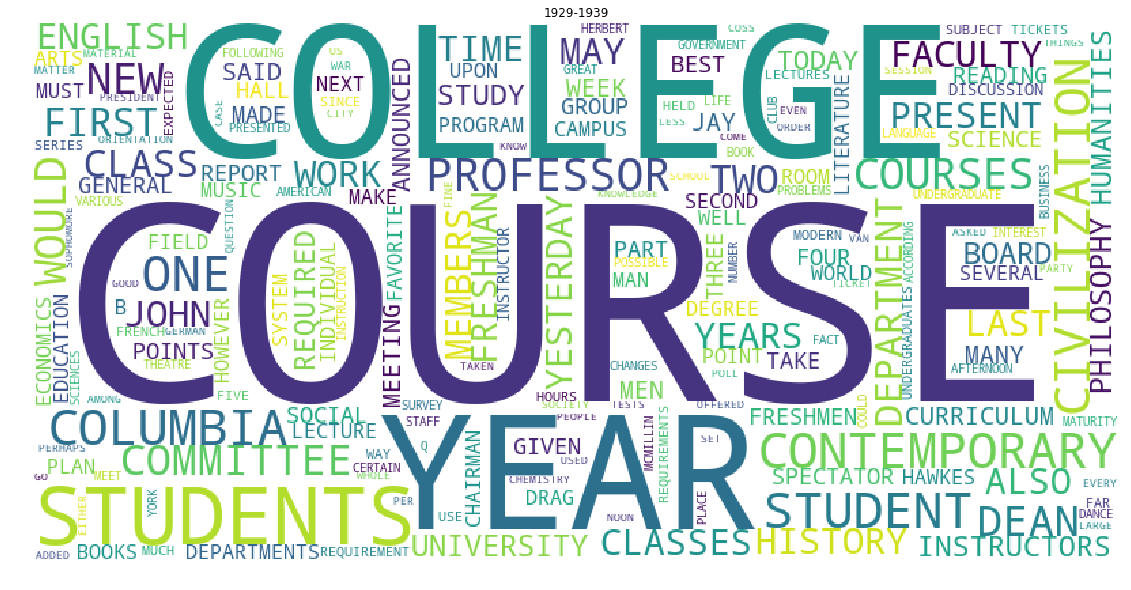

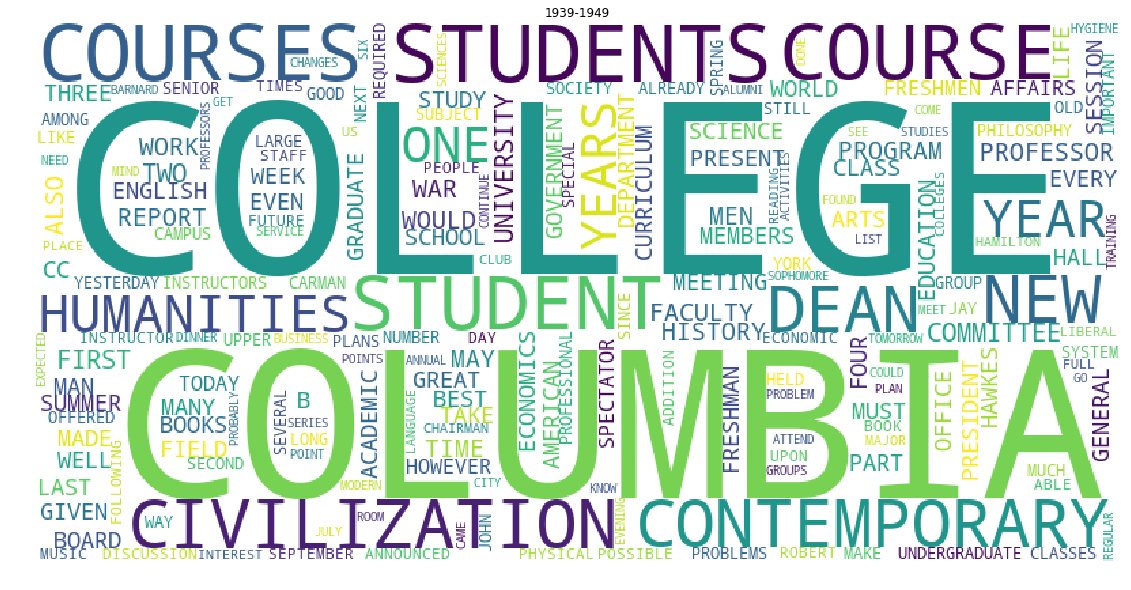

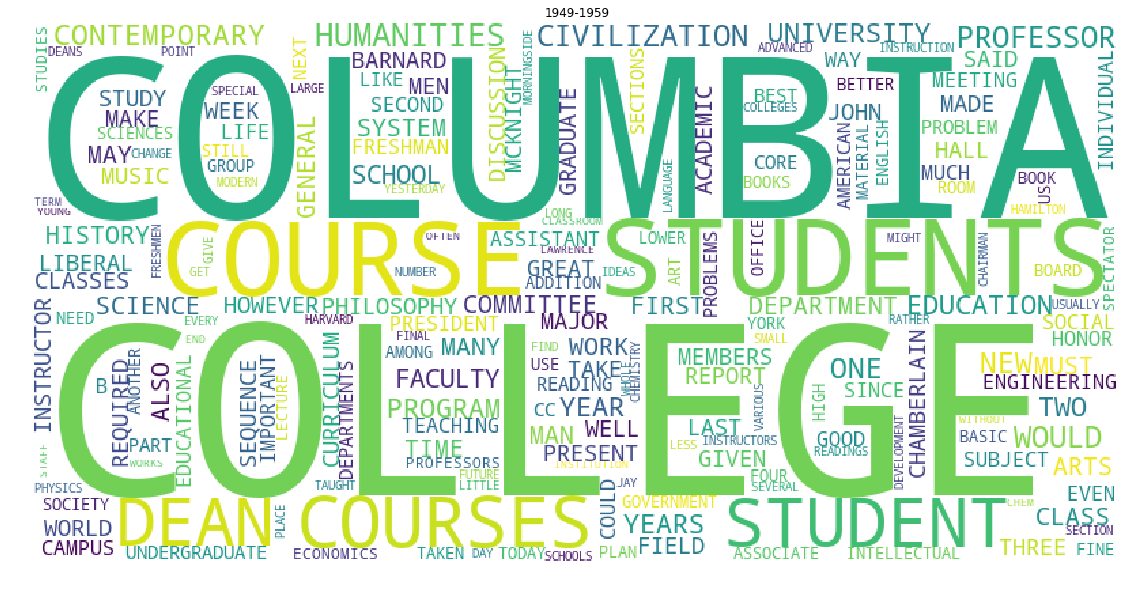

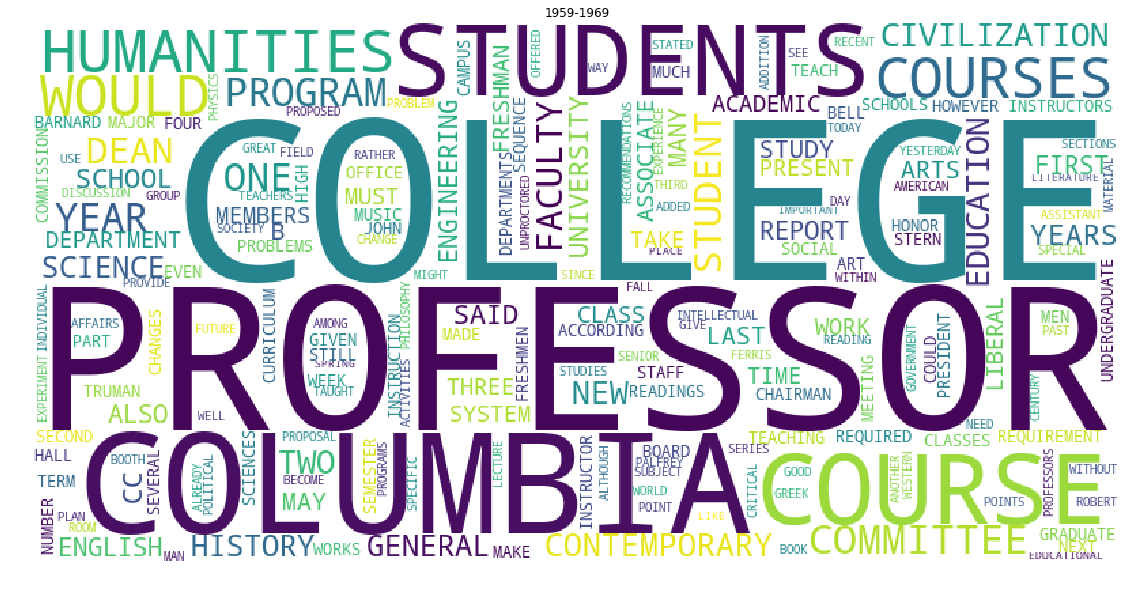

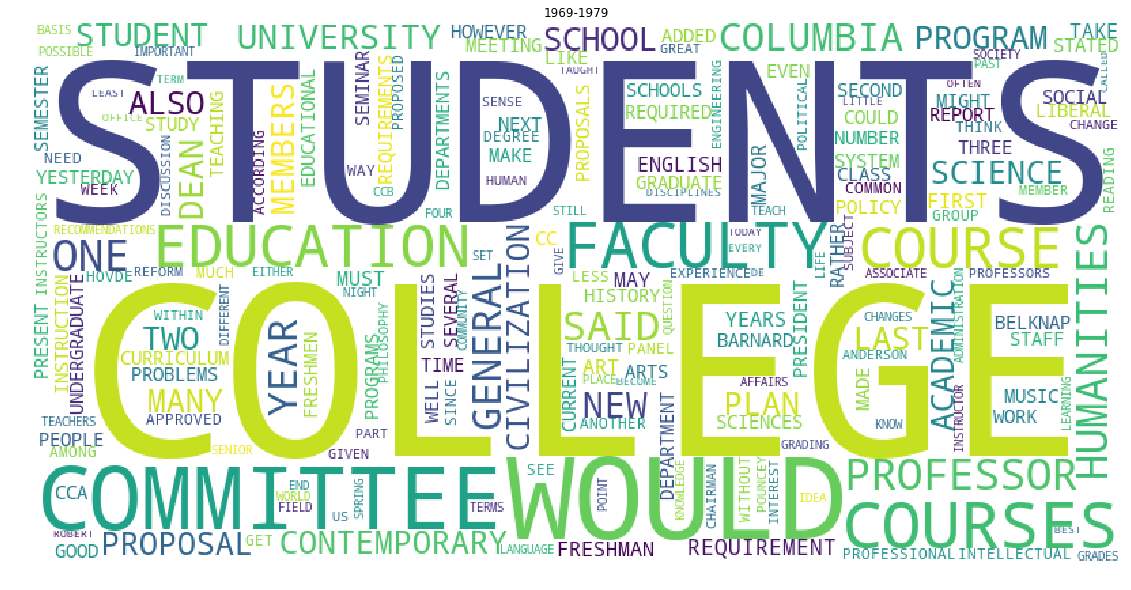

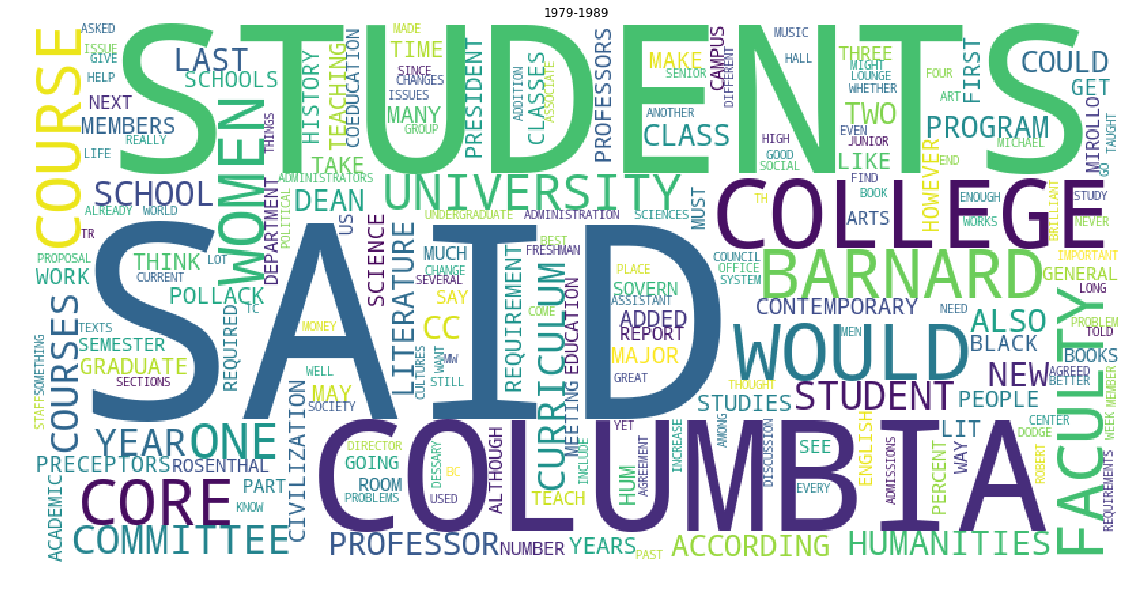

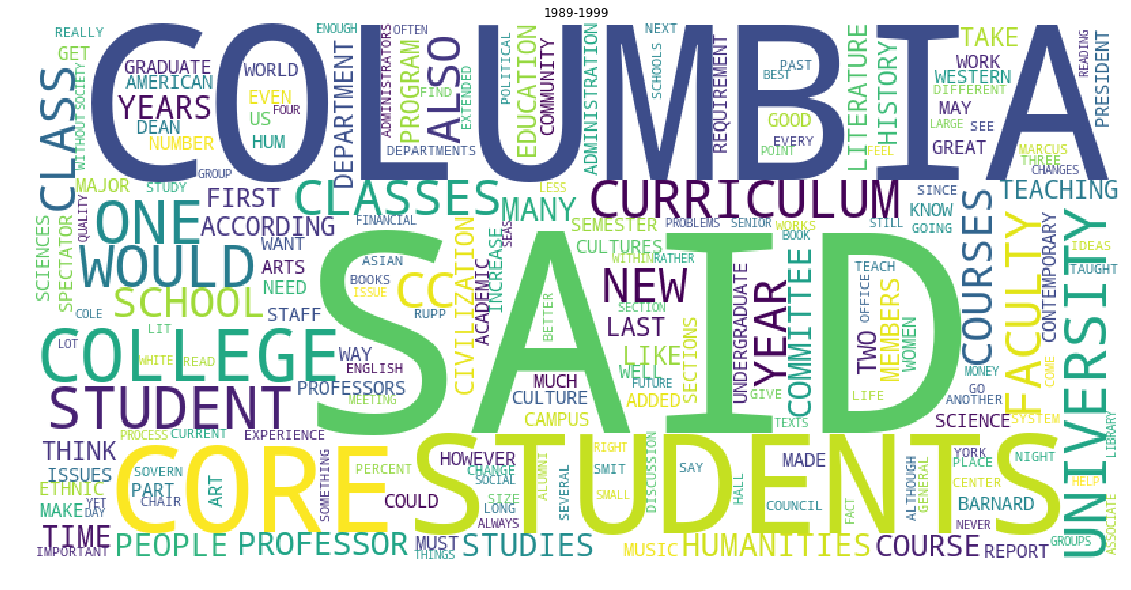

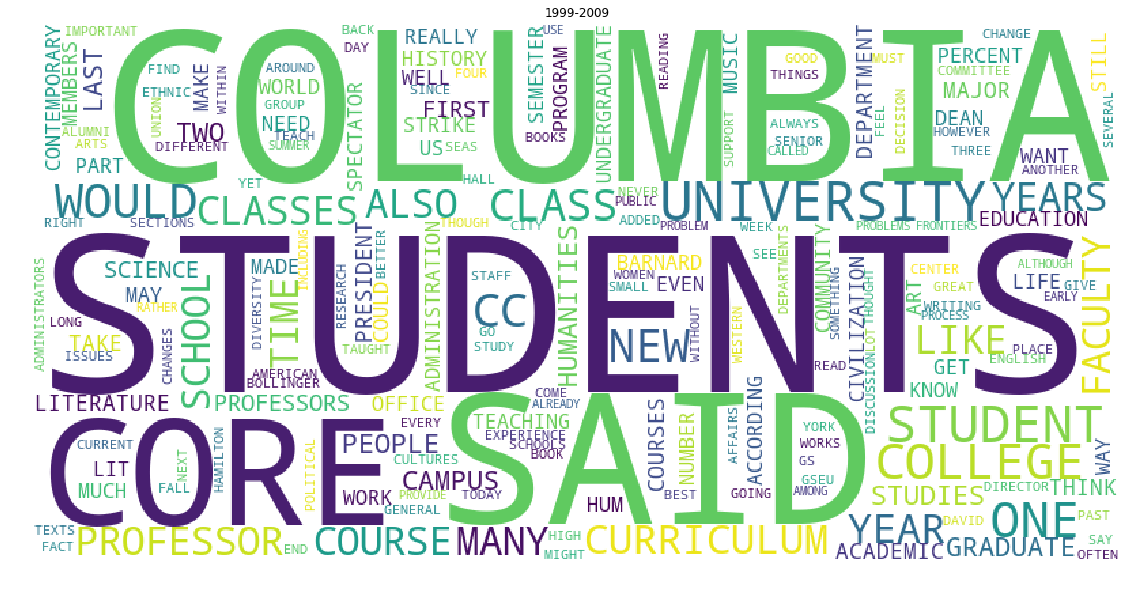

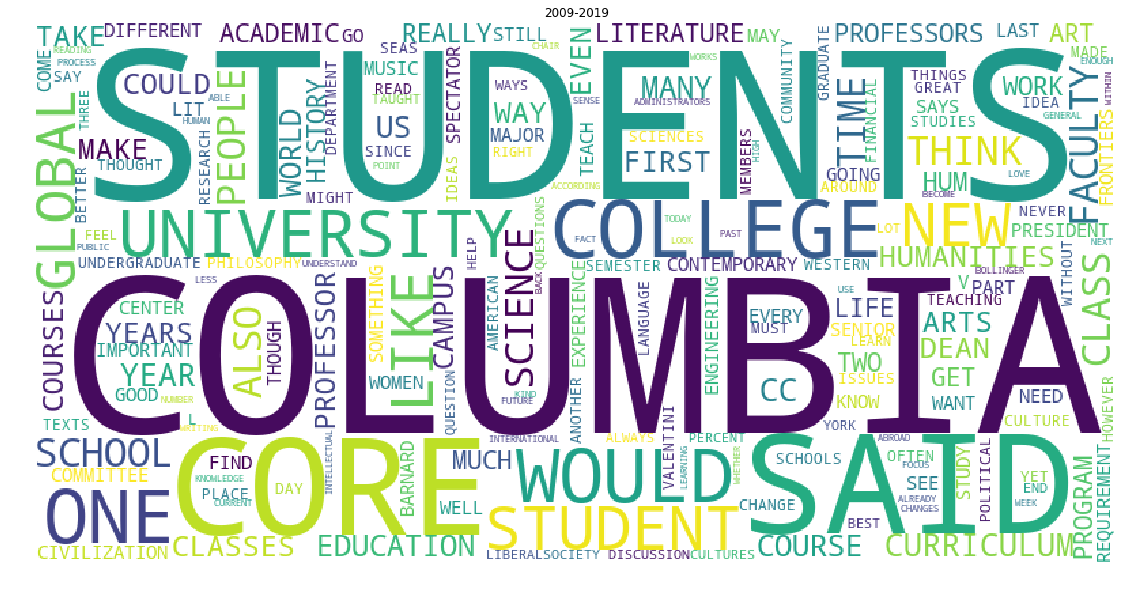

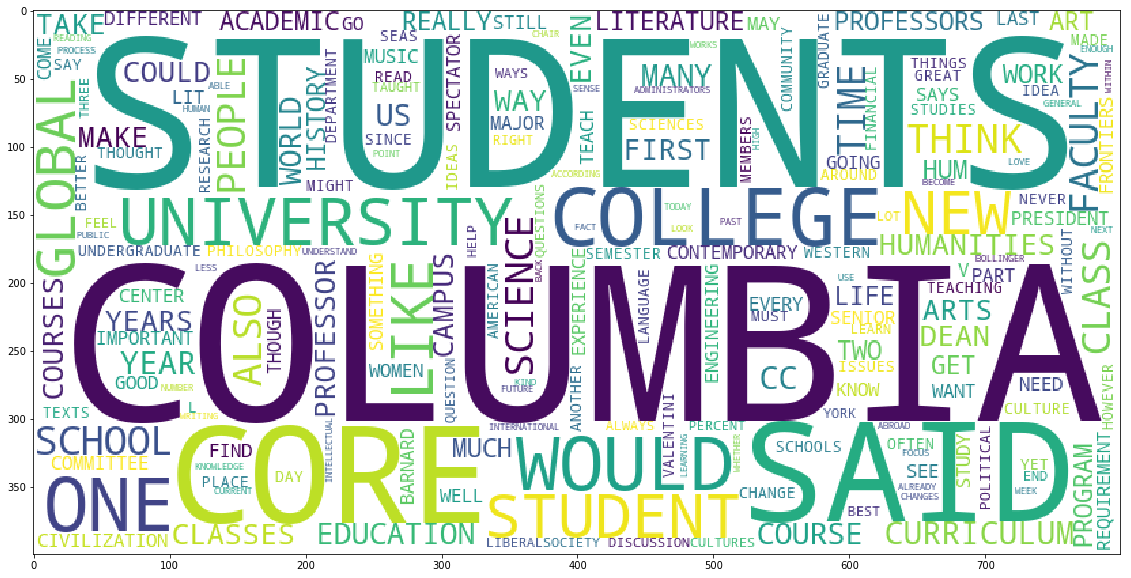

In [17]:
#word clouds for every decade's body text
for x in range(10): 
    plt.title(dates[x])
    cloudify_body(decade[x])

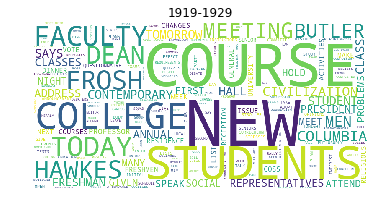

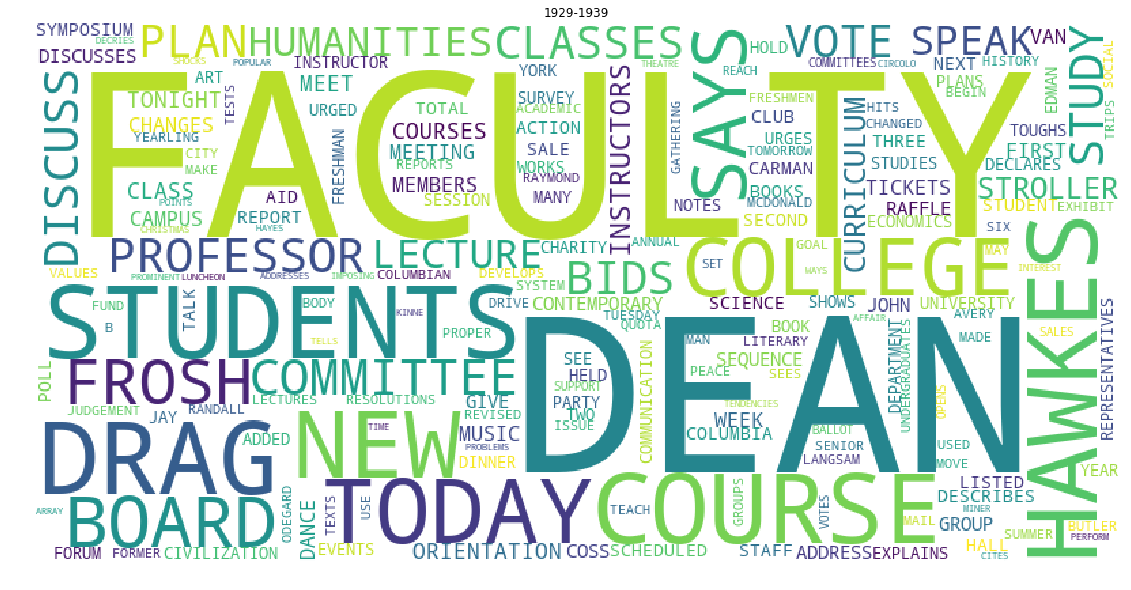

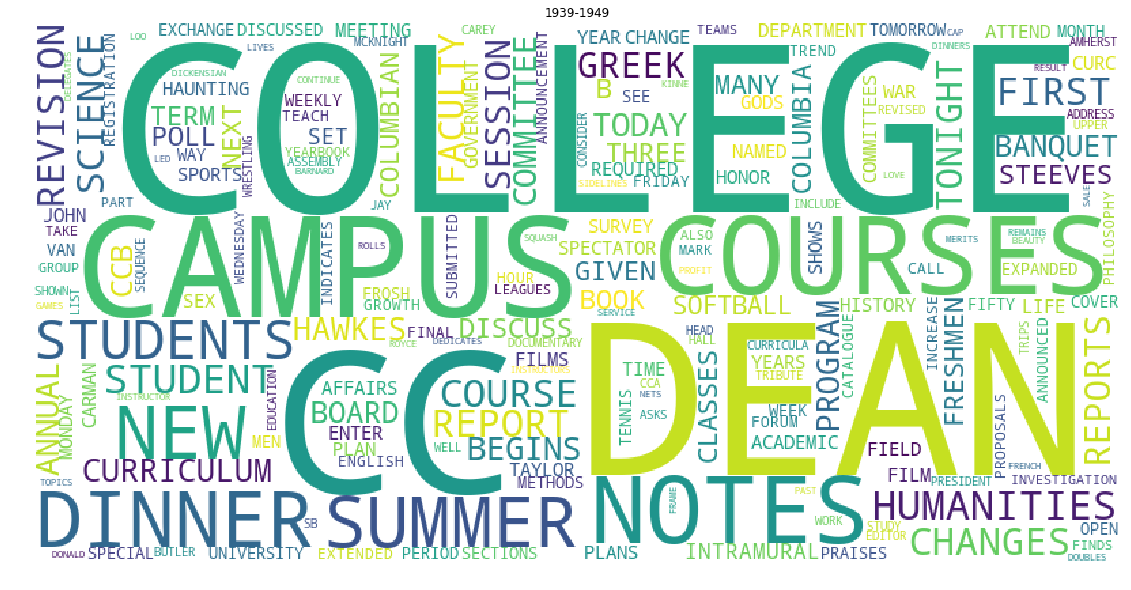

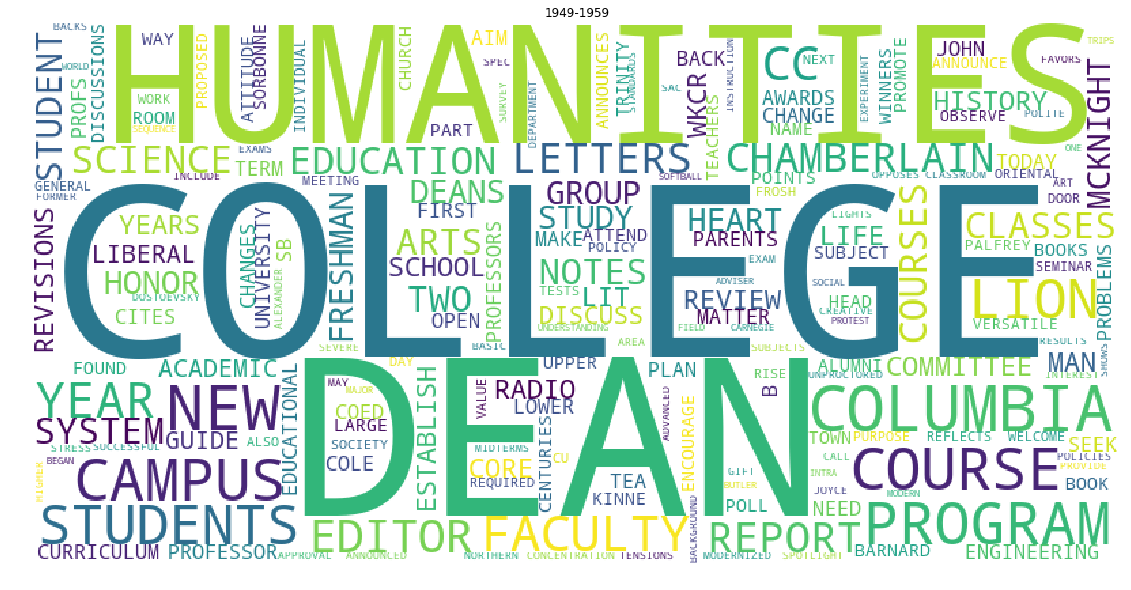

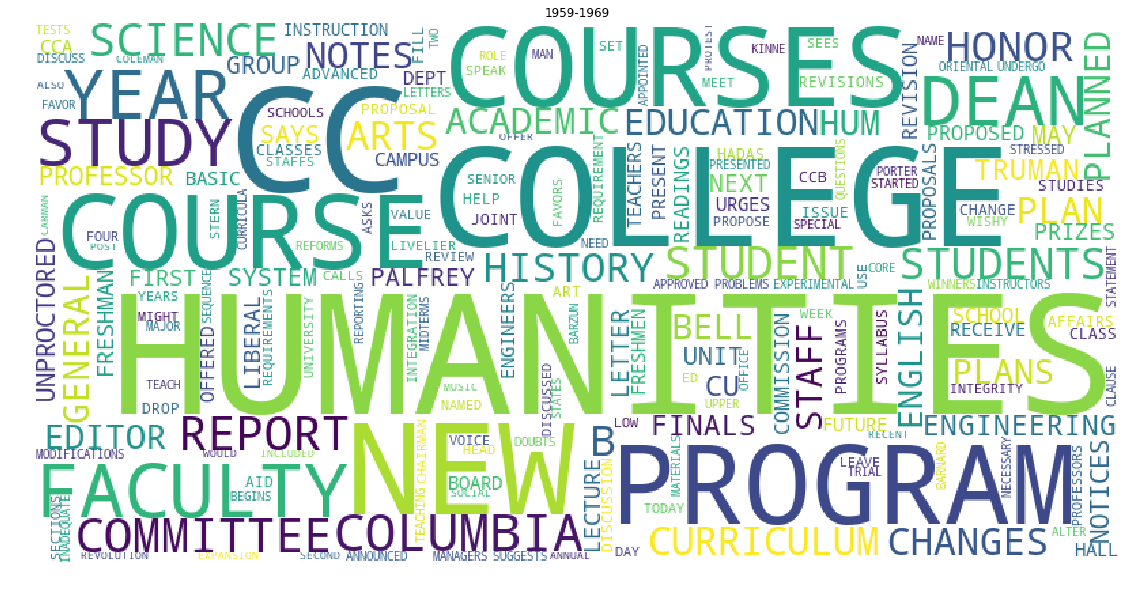

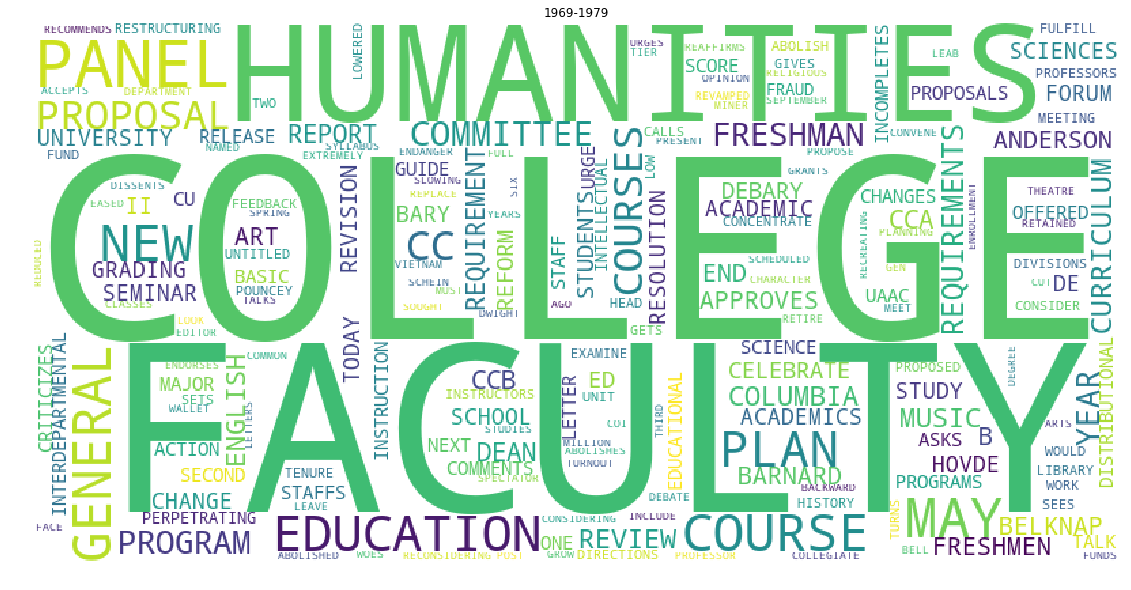

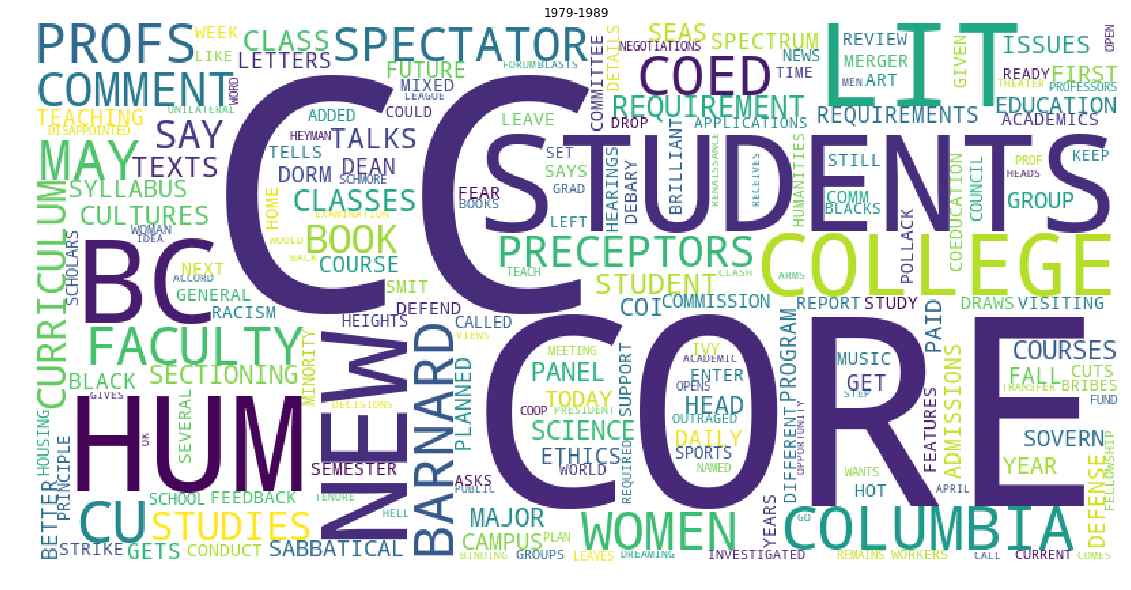

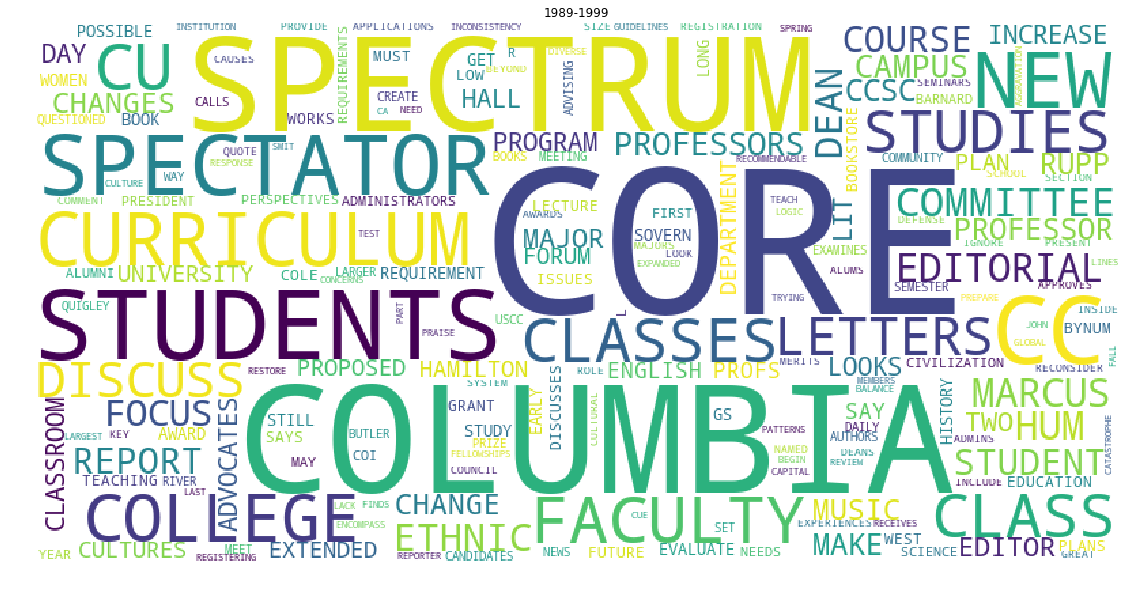

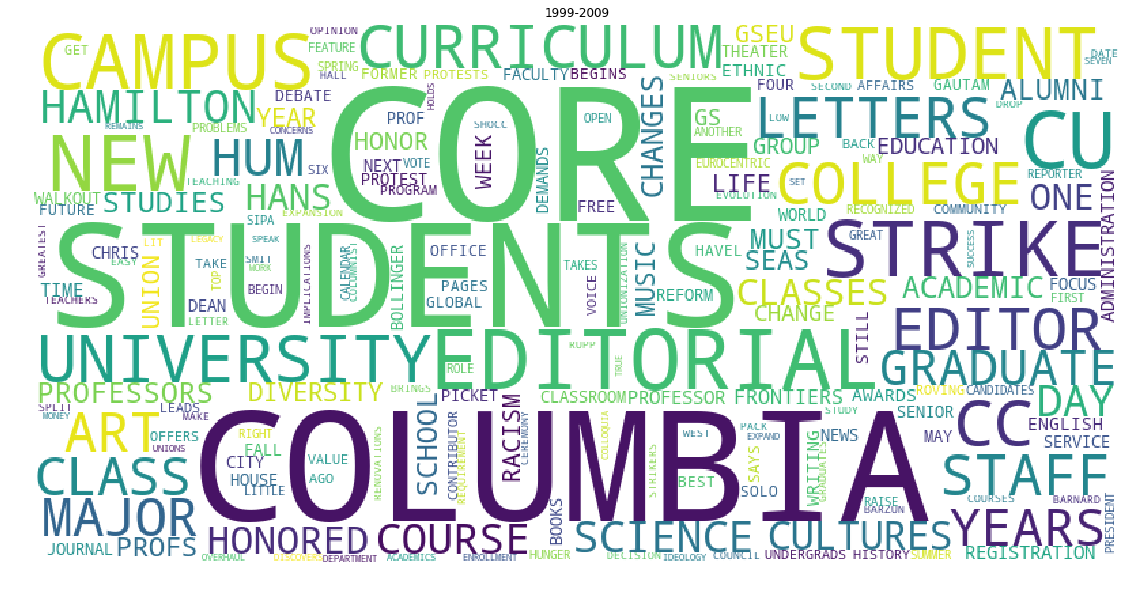

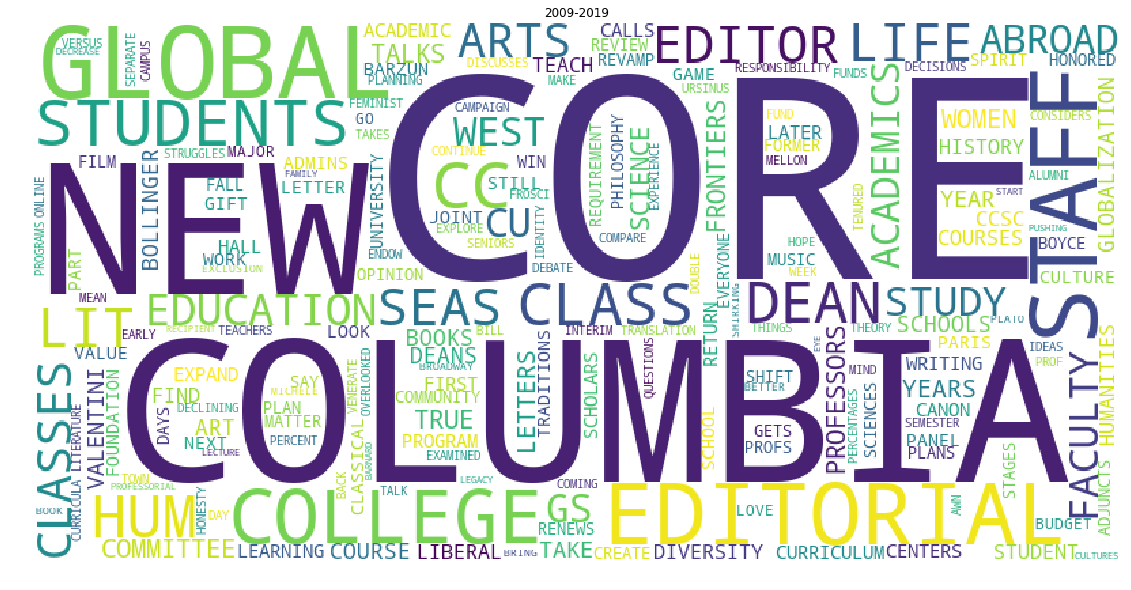

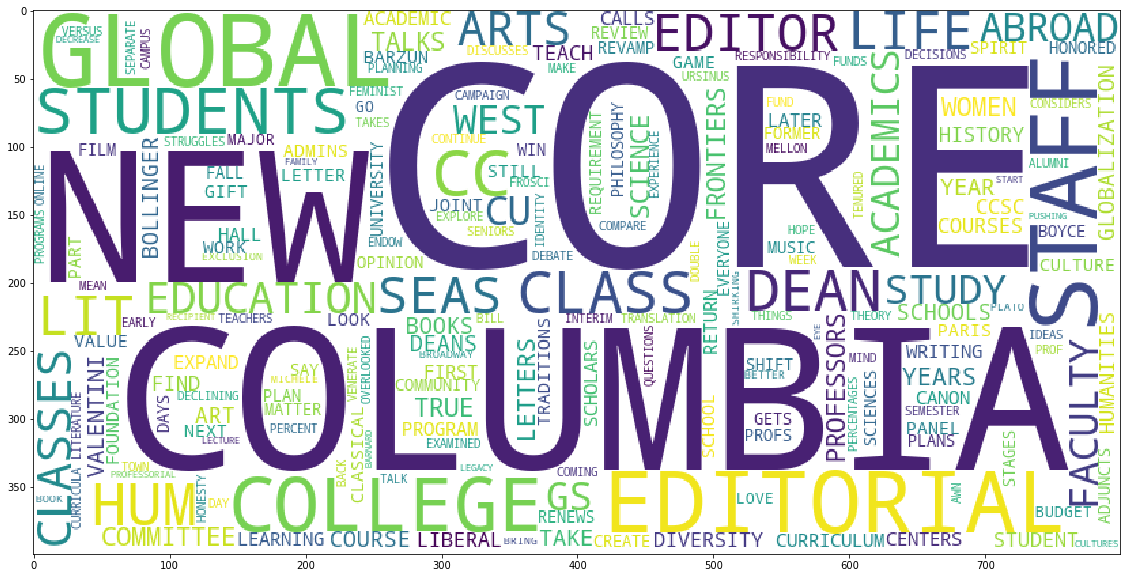

In [18]:
#word clouds for every decade's title text
for x in range(10): 
    plt.title(dates[x])
    cloudify_headlines(decade[x])

In [19]:
title_distrbuiton_by_decade = []

for table in decade:
    text = table.title.str.cat(sep=' ')
    
    tempTokens = word_tokenize(text)
    tempTokens = [w.upper() for w in  tempTokens if ((not w.lower() in stop_words) & (w.isalpha()))]

    vocabulary = set(tempTokens)

    frequency_dist = nltk.FreqDist(tempTokens)
    title_distrbuiton_by_decade.append(frequency_dist)
    
body_distrbuiton_by_decade = []

for table in decade:
    text = table.body.str.cat(sep=' ')
    
    tempTokens = word_tokenize(text)
    tempTokens = [w.upper() for w in  tempTokens if ((not w.lower() in stop_words) & (w.isalpha()))]

    vocabulary = set(tempTokens)

    frequency_dist = nltk.FreqDist(tempTokens)
    body_distrbuiton_by_decade.append(frequency_dist)

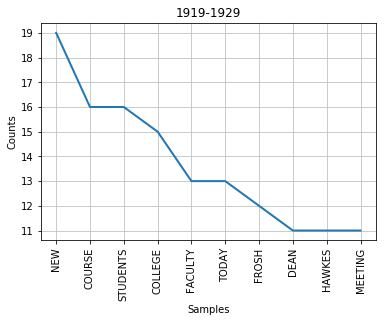

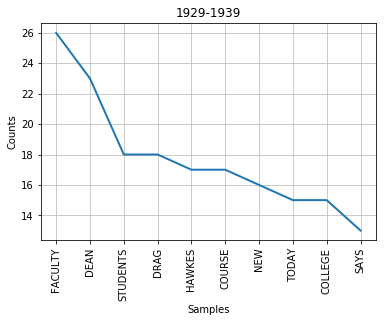

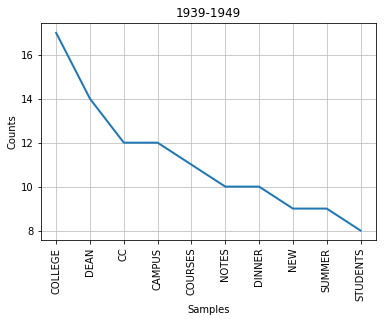

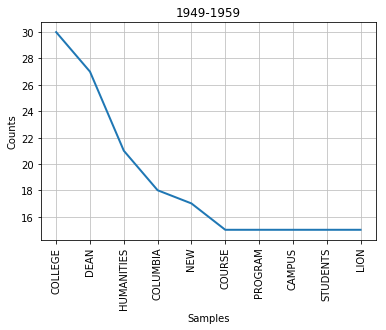

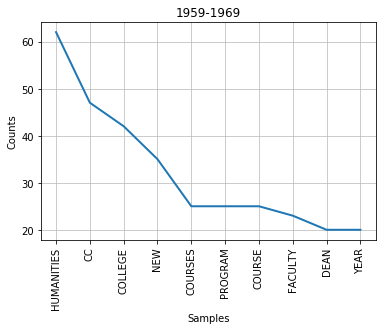

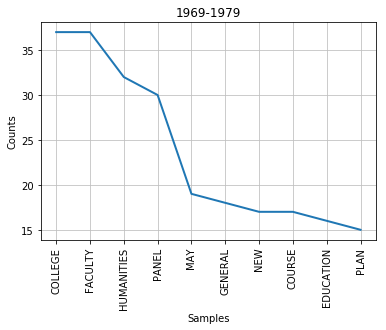

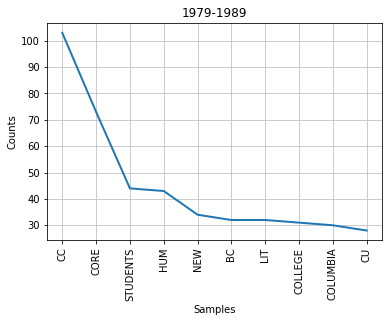

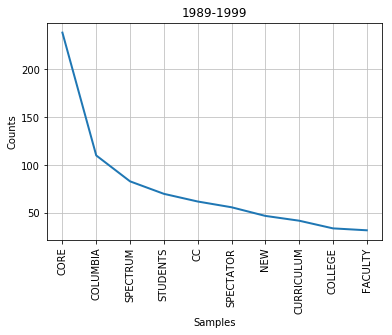

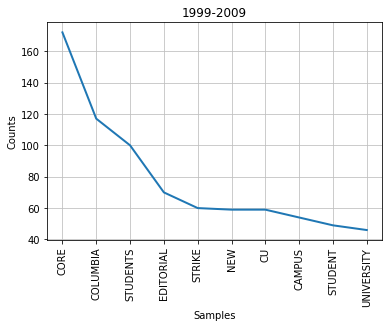

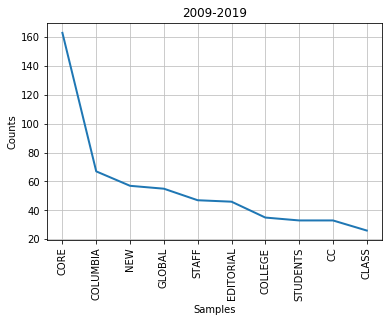

In [20]:
for x in range(10):
   # print frequecy graphs for headlines by decade
    plt.title(dates[x])
    title_distrbuiton_by_decade[x].plot(10)
   
    

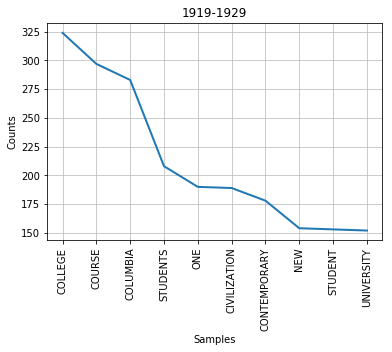

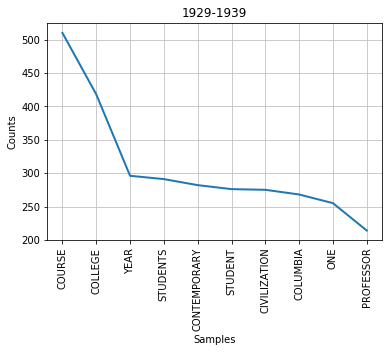

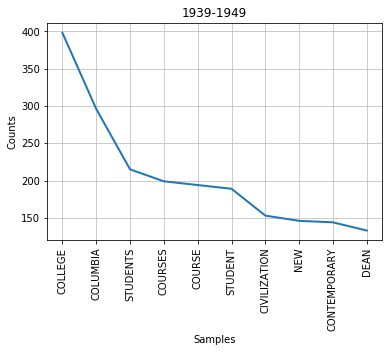

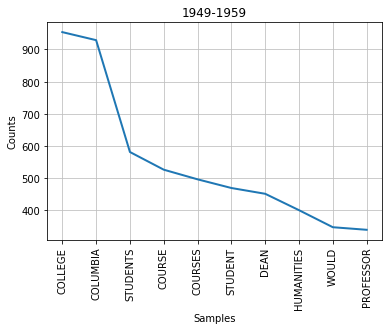

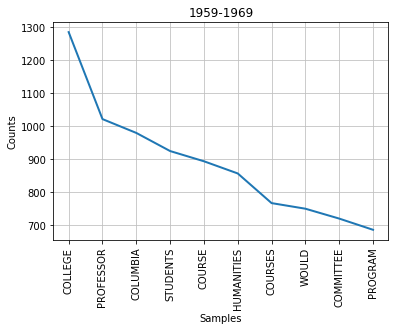

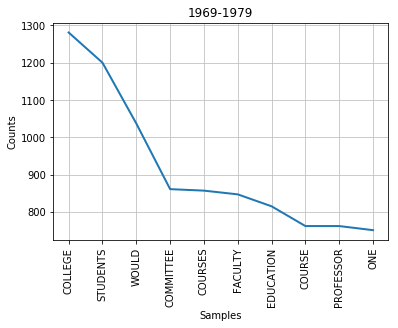

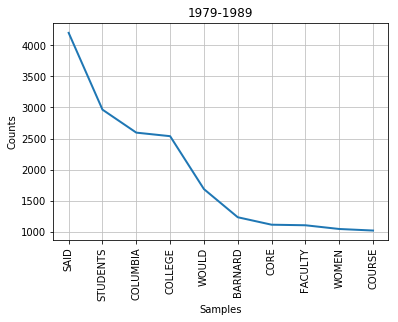

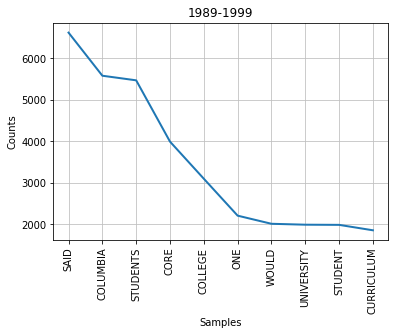

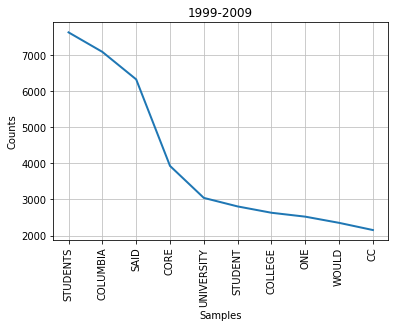

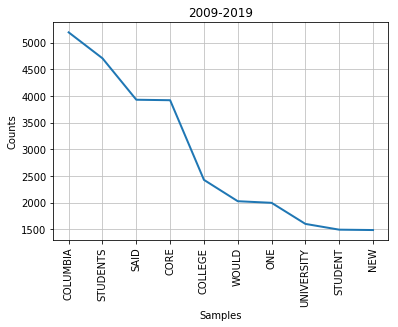

In [21]:
for x in range(10):
   # print frequecy graphs for body text by decade
    plt.title(dates[x])
    body_distrbuiton_by_decade[x].plot(10)
   
    